In [34]:
# Import basic packages
import pandas as pd
import numpy as np

In [35]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [57]:
#Read dataset
df = pd.read_csv('new.csv')
df.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55


In [15]:
# Check null
df.isna().sum()

Diet_type       0
Recipe_name     0
Cuisine_type    0
Protein(g)      0
Carbs(g)        0
Fat(g)          0
dtype: int64

In [16]:
# Check duplicated
df.duplicated().sum()

0

In [73]:
# Check Diet_type
df['Diet_type'].value_counts()

Diet_type
dash             1726
mediterranean    1705
vegan            1508
keto             1496
paleo            1258
Name: count, dtype: int64

In [18]:
# Check Diet_type
df['Diet_type'].value_counts(normalize=True)

Diet_type
dash             0.224360
mediterranean    0.221630
vegan            0.196022
keto             0.194462
paleo            0.163525
Name: proportion, dtype: float64

In [74]:
# Check Cuisine_type
df['Cuisine_type'].value_counts()

Cuisine_type
american            2870
mediterranean       1700
italian              791
french               593
world                254
british              238
mexican              223
nordic               149
south east asian     147
south american       136
asian                125
chinese              120
indian                92
middle eastern        91
eastern europe        55
japanese              50
central europe        34
caribbean             18
kosher                 7
Name: count, dtype: int64

In [20]:
# Check Cuisine_type
df['Cuisine_type'].value_counts(normalize=True)

Cuisine_type
american            0.373066
mediterranean       0.220980
italian             0.102821
french              0.077083
world               0.033017
british             0.030937
mexican             0.028987
nordic              0.019368
south east asian    0.019108
south american      0.017678
asian               0.016249
chinese             0.015599
indian              0.011959
middle eastern      0.011829
eastern europe      0.007149
japanese            0.006499
central europe      0.004420
caribbean           0.002340
kosher              0.000910
Name: proportion, dtype: float64

In [21]:
# Check Protein(g), Carbs(g) and Fat(g)
df.describe()

,Protein(g),Carbs(g),Fat(g)
count,7693.000000,7693.000000,7693.000000
mean,83.446117,152.584429,117.569581
std,90.091756,186.495216,122.320593
min,0.000000,0.060000,0.000000
25%,24.540000,36.310000,41.280000
50%,56.370000,93.770000,85.020000
75%,112.740000,205.970000,158.460000
max,1273.610000,3405.550000,1930.240000


Text(0, 0.5, 'Nutritious Information')

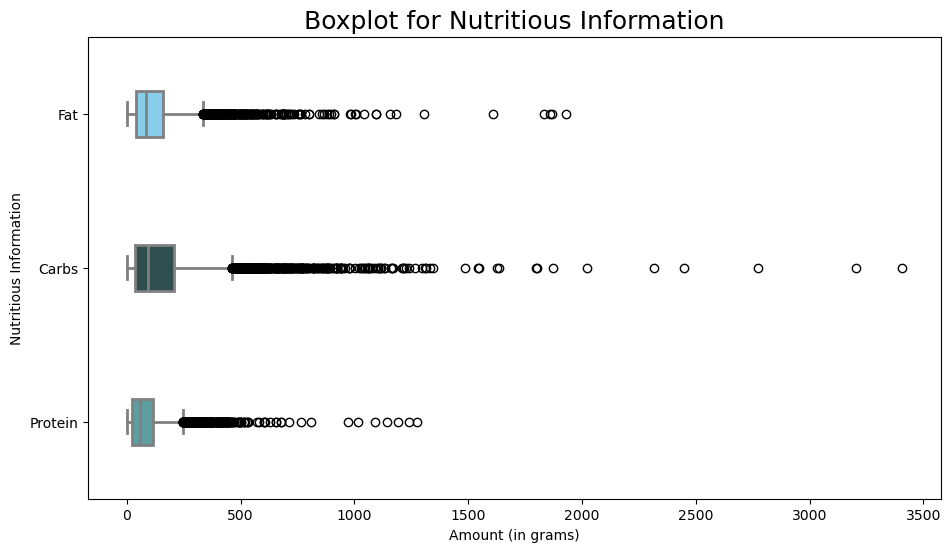

In [23]:
# Box Plot
plotdata = pd.DataFrame({
    "Protein(g)":list(df[['Protein(g)']].squeeze()),
    "Carbs(g)":list(df[['Carbs(g)']].squeeze()),
    "Fat(g)":list(df[['Fat(g)']].squeeze())})

plt.figure(figsize =(11, 6))

bplots = plt.boxplot(plotdata, vert = 0, patch_artist = True, labels=["Protein","Carbs","Fat"])

colors = ["cadetblue","darkslategray","skyblue"]
for i, bplot in enumerate(bplots['boxes']):
    bplot.set(color='gray', linewidth=2)
    bplot.set(facecolor = colors[i])

for whisker in bplots['whiskers']:
    whisker.set(color='gray', linewidth=2)

for cap in bplots['caps']:
    cap.set(color='gray', linewidth=2)

for median in bplots['medians']:
    median.set(color='gray', linewidth=2)

plt.title("Boxplot for Nutritious Information", loc="center", fontsize=18)
plt.xlabel("Amount (in grams)")
plt.ylabel("Nutritious Information")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


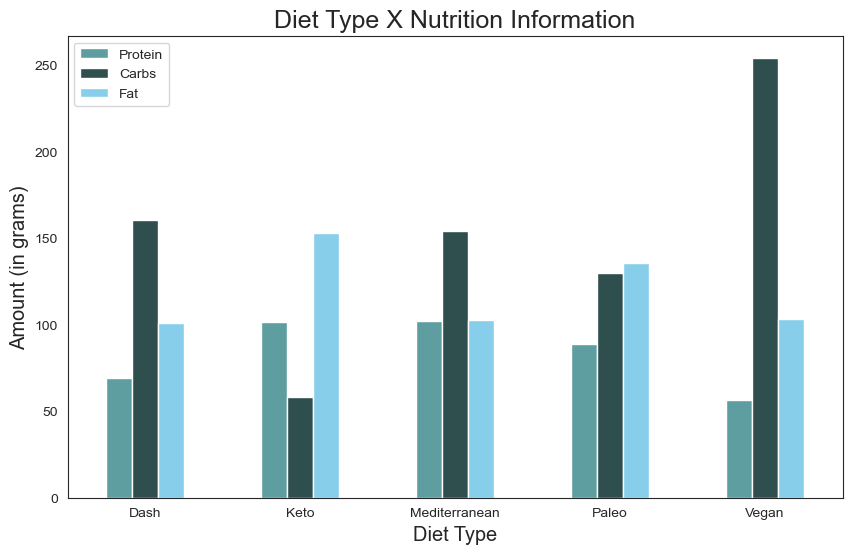

In [25]:
# Nutrition Information
analise1 = df.groupby("Diet_type").aggregate({'Protein(g)':'mean','Carbs(g)':'mean','Fat(g)':'mean'})
analise1_frame = analise1.reset_index()

# Plot
plotdata = pd.DataFrame({
    "Protein":list(analise1_frame[['Protein(g)']].squeeze()),
    "Carbs":list(analise1_frame[['Carbs(g)']].squeeze()),
    "Fat":list(analise1_frame[['Fat(g)']].squeeze())
    }, 
    index = ['Dash', 'Keto', 'Mediterranean','Paleo', 'Vegan']
)

plotdata.plot(kind="bar", color=["cadetblue","darkslategray","skyblue"],figsize=(10, 6),rot=0)
plt.title("Diet Type X Nutrition Information",loc="center", fontsize=18)#fontsize="x-large",weight="bold")
plt.xlabel("Diet Type",fontsize="x-large")
plt.ylabel("Amount (in grams)", fontsize="x-large");

In [37]:
# Correlation between Nutrition Information
x = df['Protein(g)']
y = df['Carbs(g)']
z = df['Fat(g)']
xyz = [x,y,z]

corr_matrix = np.corrcoef(xyz).round(decimals=2)
corr_matrix

array([[1.  , 0.16, 0.48],
       [0.16, 1.  , 0.27],
       [0.48, 0.27, 1.  ]])

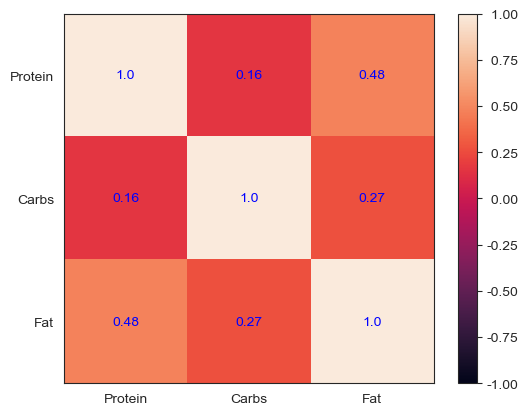

In [38]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('Protein', 'Carbs', 'Fat'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('Protein', 'Carbs', 'Fat'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='b')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')

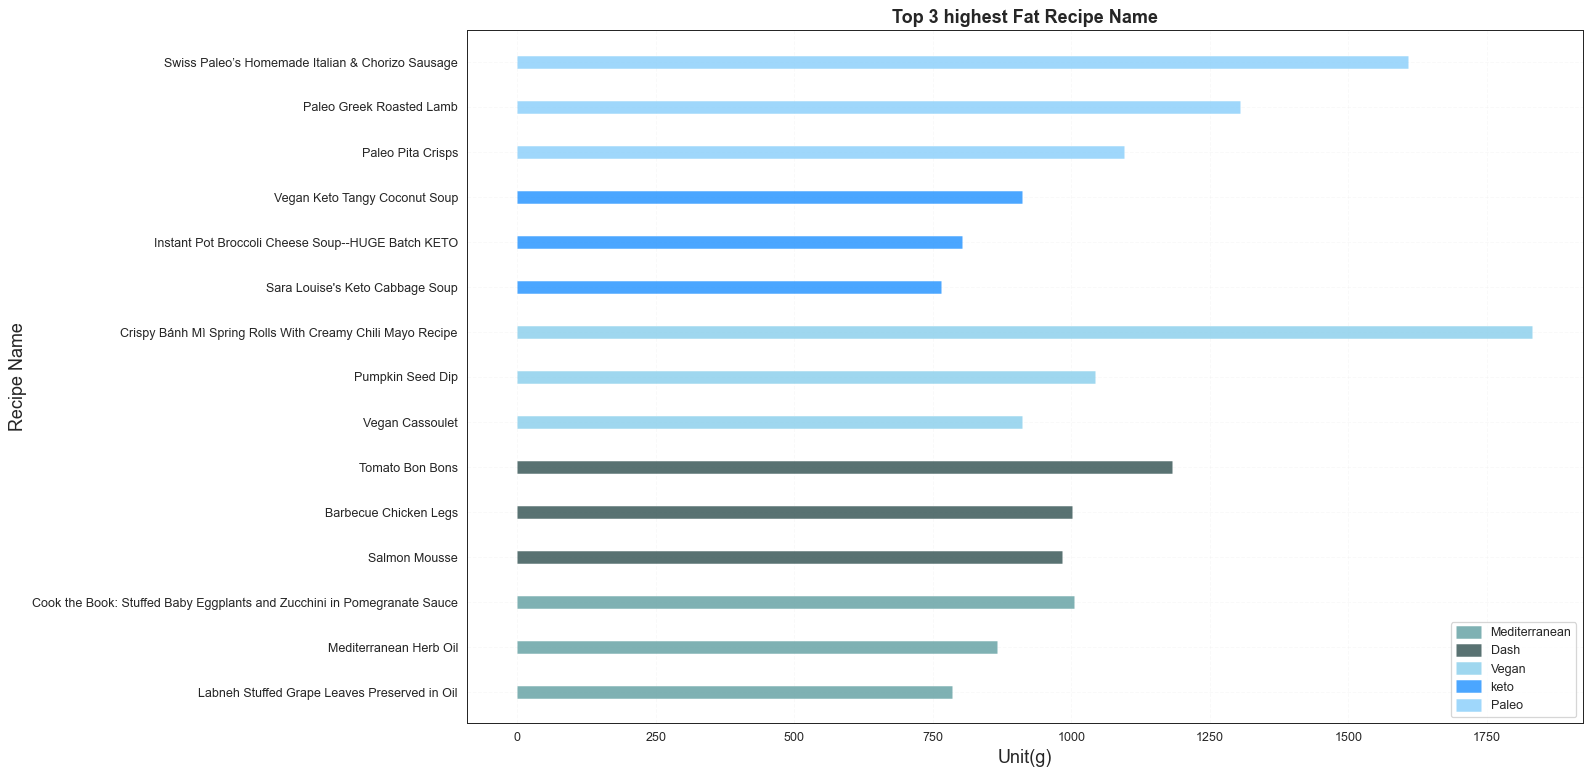

In [45]:
#Recioe with low and high fat
rec_low_fat1= df.groupby(["Diet_type","Recipe_name","Cuisine_type"]).aggregate({'Fat(g)':'min'}).reset_index().sort_values(by=['Diet_type','Fat(g)'])

# Plot Top 3 recipe with high fat
dash_hf = rec_low_fat1[rec_low_fat1['Diet_type'] == 'dash'][-4:-1:]
med_hf = rec_low_fat1[rec_low_fat1['Diet_type'] == 'mediterranean'][-4:-1:]
vegan_hf = rec_low_fat1[rec_low_fat1['Diet_type'] == 'vegan'][-4:-1:]
keto_hf = rec_low_fat1[rec_low_fat1['Diet_type'] == 'keto'][-4:-1:]
paleo_hf = rec_low_fat1[rec_low_fat1['Diet_type'] == 'paleo'][-4:-1:]

# Prepare Data
df = pd.concat([med_hf, dash_hf, vegan_hf, keto_hf, paleo_hf])
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(16,10), dpi= 90)
# plt.hlines(y=df['Recipe_name']['dash'], xmin=0, xmax=df['Fat(g)'], 
#            color=["cadetblue","darkslategray","skyblue","dodgerblue","lightskyblue"],
#            alpha=0.8, linewidth=10)
plt.hlines(y=med_hf['Recipe_name'], xmin=0, xmax=med_hf['Fat(g)'], 
           color="cadetblue",
           alpha=0.8, linewidth=10)
plt.hlines(y=dash_hf['Recipe_name'], xmin=0, xmax=dash_hf['Fat(g)'], 
           color="darkslategray",
           alpha=0.8, linewidth=10)
plt.hlines(y=vegan_hf['Recipe_name'], xmin=0, xmax=vegan_hf['Fat(g)'], 
           color="skyblue",
           alpha=0.8, linewidth=10)
plt.hlines(y=keto_hf['Recipe_name'], xmin=0, xmax=keto_hf['Fat(g)'], 
           color="dodgerblue",
           alpha=0.8, linewidth=10)
plt.hlines(y=paleo_hf['Recipe_name'], xmin=0, xmax=paleo_hf['Fat(g)'], 
           color="lightskyblue",
           alpha=0.8, linewidth=10)

# Decorations
plt.title('Top 3 highest Fat Recipe Name', fontdict={'size':20},fontsize="x-large",weight="bold")
plt.grid(linestyle='--', alpha=0.1)
plt.xlabel('Unit(g)',fontsize="x-large")
plt.ylabel('Recipe Name',fontsize="x-large")
plt.legend(["Mediterranean","Dash","Vegan","keto","Paleo"], loc ="lower right")


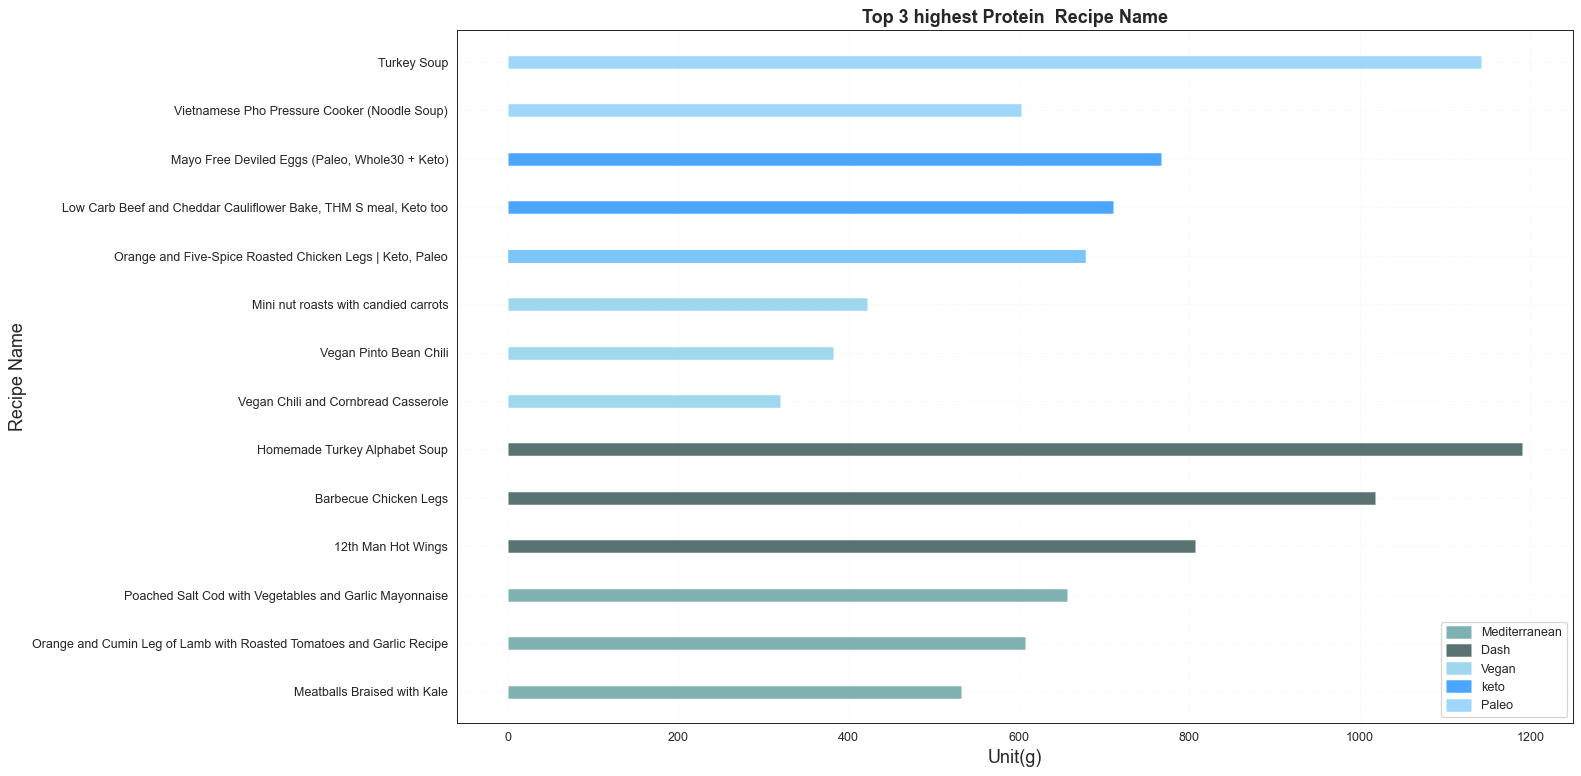

In [54]:
#Recioe with low and high fat
rec_low_fat1= df.groupby(["Diet_type","Recipe_name","Cuisine_type"]).aggregate({'Protein(g)':'min'}).reset_index().sort_values(by=['Diet_type','Protein(g)'])

# Plot Top 3 recipe with high fat
dash_hf = rec_low_fat1[rec_low_fat1['Diet_type'] == 'dash'][-4:-1:]
med_hf = rec_low_fat1[rec_low_fat1['Diet_type'] == 'mediterranean'][-4:-1:]
vegan_hf = rec_low_fat1[rec_low_fat1['Diet_type'] == 'vegan'][-4:-1:]
keto_hf = rec_low_fat1[rec_low_fat1['Diet_type'] == 'keto'][-4:-1:]
paleo_hf = rec_low_fat1[rec_low_fat1['Diet_type'] == 'paleo'][-4:-1:]

# Prepare Data
data = pd.concat([med_hf, dash_hf, vegan_hf, keto_hf, paleo_hf])
data.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(16,10), dpi= 90)
# plt.hlines(y=df['Recipe_name']['dash'], xmin=0, xmax=df['Fat(g)'], 
#            color=["cadetblue","darkslategray","skyblue","dodgerblue","lightskyblue"],
#            alpha=0.8, linewidth=10)
plt.hlines(y=med_hf['Recipe_name'], xmin=0, xmax=med_hf['Protein(g)'], 
           color="cadetblue",
           alpha=0.8, linewidth=10)
plt.hlines(y=dash_hf['Recipe_name'], xmin=0, xmax=dash_hf['Protein(g)'], 
           color="darkslategray",
           alpha=0.8, linewidth=10)
plt.hlines(y=vegan_hf['Recipe_name'], xmin=0, xmax=vegan_hf['Protein(g)'], 
           color="skyblue",
           alpha=0.8, linewidth=10)
plt.hlines(y=keto_hf['Recipe_name'], xmin=0, xmax=keto_hf['Protein(g)'], 
           color="dodgerblue",
           alpha=0.8, linewidth=10)
plt.hlines(y=paleo_hf['Recipe_name'], xmin=0, xmax=paleo_hf['Protein(g)'], 
           color="lightskyblue",
           alpha=0.8, linewidth=10)

# Decorations
plt.title('Top 3 highest Protein  Recipe Name', fontdict={'size':20},fontsize="x-large",weight="bold")
plt.grid(linestyle='--', alpha=0.1)
plt.xlabel('Unit(g)',fontsize="x-large")
plt.ylabel('Recipe Name',fontsize="x-large")
plt.legend(["Mediterranean","Dash","Vegan","keto","Paleo"], loc ="lower right")


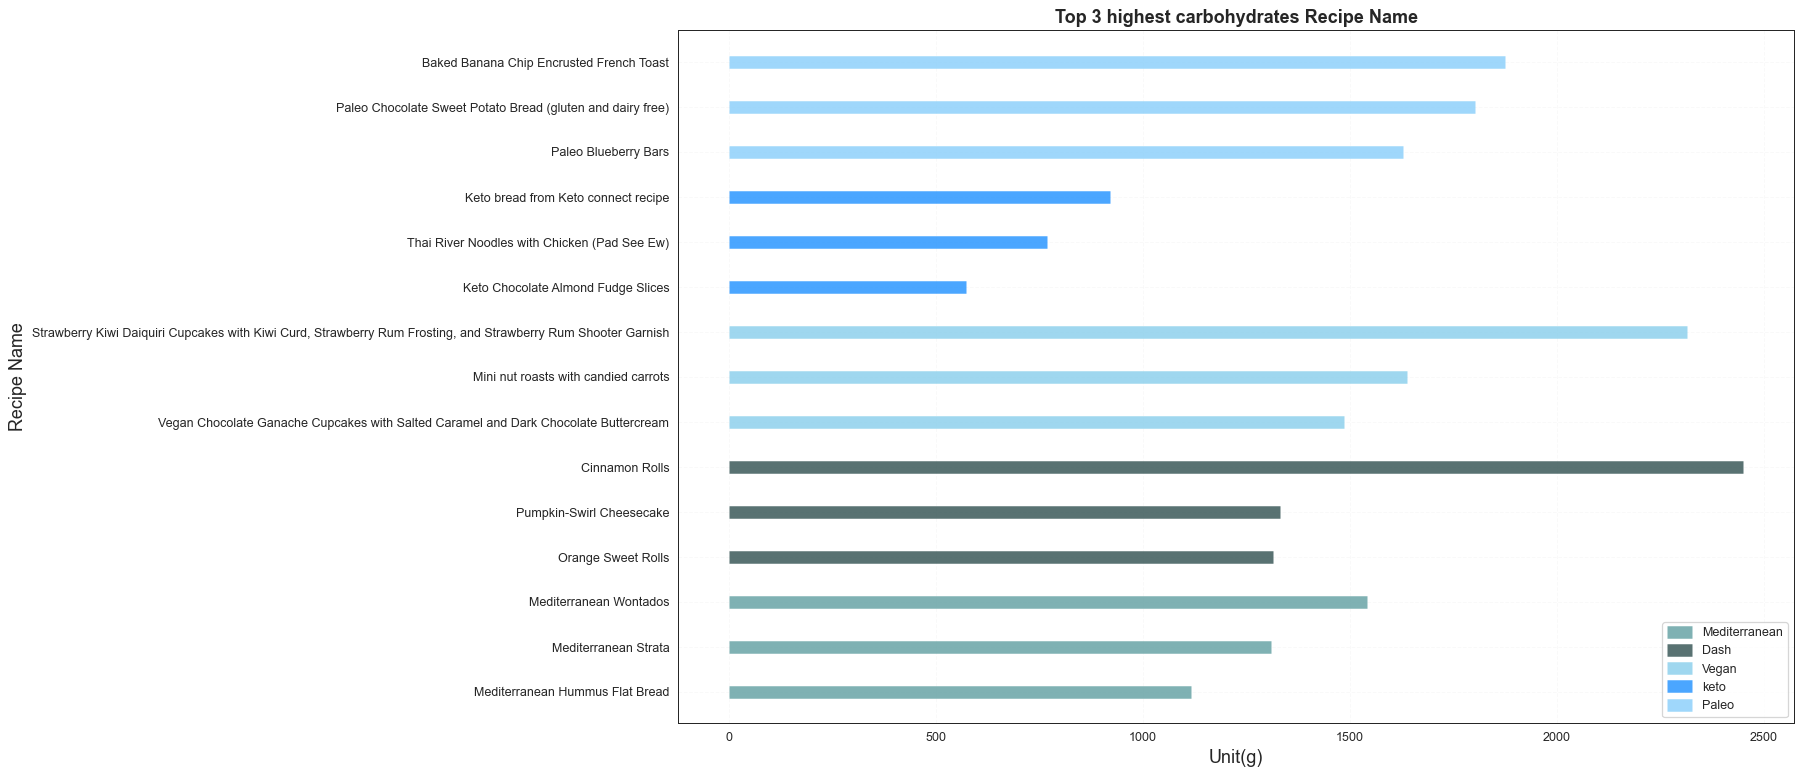

In [56]:
#Recioe with low and high fat
rec_low_fat1= df.groupby(["Diet_type","Recipe_name","Cuisine_type"]).aggregate({'Carbs(g)':'min'}).reset_index().sort_values(by=['Diet_type','Carbs(g)'])

# Plot Top 3 recipe with high fat
dash_hf = rec_low_fat1[rec_low_fat1['Diet_type'] == 'dash'][-4:-1:]
med_hf = rec_low_fat1[rec_low_fat1['Diet_type'] == 'mediterranean'][-4:-1:]
vegan_hf = rec_low_fat1[rec_low_fat1['Diet_type'] == 'vegan'][-4:-1:]
keto_hf = rec_low_fat1[rec_low_fat1['Diet_type'] == 'keto'][-4:-1:]
paleo_hf = rec_low_fat1[rec_low_fat1['Diet_type'] == 'paleo'][-4:-1:]

# Prepare Data
data = pd.concat([med_hf, dash_hf, vegan_hf, keto_hf, paleo_hf])
data.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(16,10), dpi= 90)
# plt.hlines(y=df['Recipe_name']['dash'], xmin=0, xmax=df['Fat(g)'], 
#            color=["cadetblue","darkslategray","skyblue","dodgerblue","lightskyblue"],
#            alpha=0.8, linewidth=10)
plt.hlines(y=med_hf['Recipe_name'], xmin=0, xmax=med_hf['Carbs(g)'], 
           color="cadetblue",
           alpha=0.8, linewidth=10)
plt.hlines(y=dash_hf['Recipe_name'], xmin=0, xmax=dash_hf['Carbs(g)'], 
           color="darkslategray",
           alpha=0.8, linewidth=10)
plt.hlines(y=vegan_hf['Recipe_name'], xmin=0, xmax=vegan_hf['Carbs(g)'], 
           color="skyblue",
           alpha=0.8, linewidth=10)
plt.hlines(y=keto_hf['Recipe_name'], xmin=0, xmax=keto_hf['Carbs(g)'], 
           color="dodgerblue",
           alpha=0.8, linewidth=10)
plt.hlines(y=paleo_hf['Recipe_name'], xmin=0, xmax=paleo_hf['Carbs(g)'], 
           color="lightskyblue",
           alpha=0.8, linewidth=10)

# Decorations
plt.title('Top 3 highest carbohydrates Recipe Name', fontdict={'size':20},fontsize="x-large",weight="bold")
plt.grid(linestyle='--', alpha=0.1)
plt.xlabel('Unit(g)',fontsize="x-large")
plt.ylabel('Recipe Name',fontsize="x-large")
plt.legend(["Mediterranean","Dash","Vegan","keto","Paleo"], loc ="lower right")


## Tokenization

Devide paragrah into sentences, sentences into works (called token)

In [58]:
# Import tokenize 
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/biplabbijoymahato/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [59]:
# Set the diet type into separate dataset
med = df[df['Diet_type'] == 'mediterranean']
dash = df[df['Diet_type'] == 'dash']
vegan = df[df['Diet_type'] == 'vegan']
keto = df[df['Diet_type'] == 'keto']
paleo = df[df['Diet_type'] == 'paleo']

# Split sentences into word (token) using word tokenze
med['wt'] = [word_tokenize(med['Recipe_name'][i]) for i in med.index]
dash['wt'] = [word_tokenize(dash['Recipe_name'][i]) for i in dash.index]
vegan['wt'] = [word_tokenize(vegan['Recipe_name'][i]) for i in vegan.index]
keto['wt'] = [word_tokenize(keto['Recipe_name'][i]) for i in keto.index]
paleo['wt'] = [word_tokenize(paleo['Recipe_name'][i]) for i in paleo.index]

/var/folders/jj/sn9_wwps1r7bkv9sm52vv7240000gn/T/ipykernel_1177/832939127.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med['wt'] = [word_tokenize(med['Recipe_name'][i]) for i in med.index]
/var/folders/jj/sn9_wwps1r7bkv9sm52vv7240000gn/T/ipykernel_1177/832939127.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dash['wt'] = [word_tokenize(dash['Recipe_name'][i]) for i in dash.index]
/var/folders/jj/sn9_wwps1r7bkv9sm52vv7240000gn/T/ipykernel_1177/832939127.py:11: SettingWithCopyWarning: 
A value is

In [60]:
# Word Punctuation Tokenizer
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()

# Split sentences into word (token) using Word Punct Tokenizer (here splits punctuations)
med['wt2'] = [tokenizer.tokenize(med['Recipe_name'][i]) for i in med.index]
dash['wt2'] = [tokenizer.tokenize(dash['Recipe_name'][i]) for i in dash.index]
vegan['wt2'] = [tokenizer.tokenize(vegan['Recipe_name'][i]) for i in vegan.index]
keto['wt2'] = [tokenizer.tokenize(keto['Recipe_name'][i]) for i in keto.index]
paleo['wt2'] = [tokenizer.tokenize(paleo['Recipe_name'][i]) for i in paleo.index]

/var/folders/jj/sn9_wwps1r7bkv9sm52vv7240000gn/T/ipykernel_1177/4033403685.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med['wt2'] = [tokenizer.tokenize(med['Recipe_name'][i]) for i in med.index]
/var/folders/jj/sn9_wwps1r7bkv9sm52vv7240000gn/T/ipykernel_1177/4033403685.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dash['wt2'] = [tokenizer.tokenize(dash['Recipe_name'][i]) for i in dash.index]
/var/folders/jj/sn9_wwps1r7bkv9sm52vv7240000gn/T/ipykernel_1177/4033403685.py:9: SettingWithCopyWarning

## REGEX

Use regex to dropout ponctuations

In [61]:
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import regexp_tokenize

tokenizerRE = RegexpTokenizer(r'\w+', gaps = False)

In [62]:
# Apply regex for punctuations
med['re'] = [tokenizerRE.tokenize(med['Recipe_name'][i]) for i in med.index]
dash['re'] = [tokenizerRE.tokenize(dash['Recipe_name'][i]) for i in dash.index]
vegan['re'] = [tokenizerRE.tokenize(vegan['Recipe_name'][i]) for i in vegan.index]
keto['re'] = [tokenizerRE.tokenize(keto['Recipe_name'][i]) for i in keto.index]
paleo['re'] = [tokenizerRE.tokenize(paleo['Recipe_name'][i]) for i in paleo.index]
paleo

/var/folders/jj/sn9_wwps1r7bkv9sm52vv7240000gn/T/ipykernel_1177/2377833629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med['re'] = [tokenizerRE.tokenize(med['Recipe_name'][i]) for i in med.index]
/var/folders/jj/sn9_wwps1r7bkv9sm52vv7240000gn/T/ipykernel_1177/2377833629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dash['re'] = [tokenizerRE.tokenize(dash['Recipe_name'][i]) for i in dash.index]
/var/folders/jj/sn9_wwps1r7bkv9sm52vv7240000gn/T/ipykernel_1177/2377833629.py:4: SettingWithCopyWarni

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),wt,wt2,re
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,"[Bone, Broth, From, 'Nom, Nom, Paleo, ']","[Bone, Broth, From, ', Nom, Nom, Paleo, ']","[Bone, Broth, From, Nom, Nom, Paleo]"
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,"[Paleo, Effect, Asian-Glazed, Pork, Sides, ,, ...","[Paleo, Effect, Asian, -, Glazed, Pork, Sides,...","[Paleo, Effect, Asian, Glazed, Pork, Sides, A,..."
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,"[Paleo, Pumpkin, Pie]","[Paleo, Pumpkin, Pie]","[Paleo, Pumpkin, Pie]"
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,"[Strawberry, Guacamole, recipes]","[Strawberry, Guacamole, recipes]","[Strawberry, Guacamole, recipes]"
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,"[Asian, Cauliflower, Fried, ``, Rice, '', From...","[Asian, Cauliflower, Fried, "", Rice, "", From, ...","[Asian, Cauliflower, Fried, Rice, From, Nom, N..."
...,...,...,...,...,...,...,...,...,...
1253,paleo,Sunday Slow Cooker: Thai Curry Ground Beef rec...,south east asian,104.82,34.94,32.89,"[Sunday, Slow, Cooker, :, Thai, Curry, Ground,...","[Sunday, Slow, Cooker, :, Thai, Curry, Ground,...","[Sunday, Slow, Cooker, Thai, Curry, Ground, Be..."
1254,paleo,Paleo Chicken Nuggets recipes,american,211.64,47.69,100.54,"[Paleo, Chicken, Nuggets, recipes]","[Paleo, Chicken, Nuggets, recipes]","[Paleo, Chicken, Nuggets, recipes]"
1255,paleo,Paleo Bacon-Wrapped Cauliflower,american,70.23,224.84,424.27,"[Paleo, Bacon-Wrapped, Cauliflower]","[Paleo, Bacon, -, Wrapped, Cauliflower]","[Paleo, Bacon, Wrapped, Cauliflower]"
1256,paleo,Green Eggs and Bacon,american,28.37,13.96,101.73,"[Green, Eggs, and, Bacon]","[Green, Eggs, and, Bacon]","[Green, Eggs, and, Bacon]"


## STOP WORDS

Common words that usually don't have meaning

In [63]:
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stops = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/biplabbijoymahato/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [64]:
# Apply stop word to column with regex applied
med_words = [palavra.lower() for i in med.index for palavra in med['re'][i] if palavra not in english_stops]
dash_words = [palavra.lower() for i in dash.index for palavra in dash['re'][i] if palavra not in english_stops]
vegan_words = [palavra.lower() for i in vegan.index for palavra in vegan['re'][i] if palavra not in english_stops]
keto_words = [palavra.lower() for i in keto.index for palavra in keto['re'][i] if palavra not in english_stops]
paleo_words = [palavra.lower() for i in paleo.index for palavra in paleo['re'][i] if palavra not in english_stops]
paleo_words

['bone',
 'broth',
 'from',
 'nom',
 'nom',
 'paleo',
 'paleo',
 'effect',
 'asian',
 'glazed',
 'pork',
 'sides',
 'a',
 'sweet',
 'crispy',
 'appetizer',
 'paleo',
 'pumpkin',
 'pie',
 'strawberry',
 'guacamole',
 'recipes',
 'asian',
 'cauliflower',
 'fried',
 'rice',
 'from',
 'nom',
 'nom',
 'paleo',
 'paleo',
 'shrimp',
 'stuffed',
 'mushrooms',
 'recipes',
 'paleo',
 'pumpkin',
 'pie',
 'recipes',
 'autoimmune',
 'paleo',
 'pesto',
 'baked',
 'banana',
 'chip',
 'encrusted',
 'french',
 'toast',
 'vietnamese',
 'pho',
 'pressure',
 'cooker',
 'noodle',
 'soup',
 'paleo',
 'collard',
 'burrito',
 'paleo',
 'chawanmushi',
 'savory',
 'egg',
 'custard',
 'recipes',
 'paleo',
 'banana',
 'bread',
 'leftover',
 'turkey',
 'sandwich',
 'recipes',
 'paleo',
 'pumpkin',
 'waffles',
 'fudgy',
 'paleo',
 'brownies',
 'magic',
 'wings',
 'recipes',
 'turkey',
 'club',
 'sandwich',
 'easy',
 'paleo',
 'meatloaf',
 'paleo',
 'crepes',
 'chocolate',
 'pecan',
 'pie',
 'recipes',
 'simple',
 '

## Stemming

Stem removes suffix and prefix from words

In [65]:
from nltk.stem import PorterStemmer
from nltk.stem import RegexpStemmer

porter_stemmer = PorterStemmer()

In [66]:
# Apply Stemming
med_words = [porter_stemmer.stem(word) for word in med_words]
dash_words = [porter_stemmer.stem(word) for word in dash_words]
vegan_words = [porter_stemmer.stem(word) for word in vegan_words]
keto_words = [porter_stemmer.stem(word) for word in keto_words]
paleo_words = [porter_stemmer.stem(word) for word in paleo_words]
keto_words

['keto',
 'fat',
 'bomb',
 'keto',
 'egg',
 'bite',
 'recip',
 'keto',
 'key',
 'lime',
 'mouss',
 'keto',
 'peanut',
 'butter',
 'squar',
 'yogurt',
 'rice',
 'reinvent',
 'the',
 'keto',
 'way',
 'keto',
 'chicken',
 'pot',
 'pie',
 'casserol',
 'recip',
 'chocol',
 'mouss',
 'paleo',
 'keto',
 'low',
 'carb',
 'cloud',
 'bread',
 'cheesi',
 'chaffl',
 'sandwich',
 'avocado',
 'bacon',
 'sf',
 'gf',
 'orang',
 'clove',
 'oliv',
 'oil',
 'cake',
 'low',
 'carb',
 'keto',
 'friendli',
 'zucchini',
 'noodl',
 'spici',
 'meatbal',
 'recip',
 'cauliflow',
 'rice',
 'recip',
 'pesto',
 'shrimp',
 'skewer',
 'keto',
 'everyth',
 'bagel',
 'chicken',
 'keto',
 'chocol',
 'cake',
 'celeri',
 'leaf',
 'fennel',
 'poach',
 'salmon',
 'keto',
 'taco',
 'casserol',
 'keto',
 'burger',
 'stuf',
 'onion',
 'keto',
 'tuna',
 'melt',
 'bite',
 'keto',
 'dog',
 'keto',
 'taquito',
 'keto',
 'meatbal',
 'keto',
 'crunchwrap',
 'keto',
 'chili',
 'keto',
 'tortilla',
 'chip',
 'keto',
 'chocol',
 'truff

In [69]:
# Word Cloud 
import wordcloud
from wordcloud import WordCloud

In [70]:
text_aux = [med_words, dash_words, vegan_words, keto_words, paleo_words]

In [71]:
text = ' '
for i in text_aux:
    for j in i:
        text = text + ' ' + ''.join(j)
text

'  mediterranean cucumb tonic loup de mer mediterranean seabass mediterranean bake trout oliv fennel tomato recip mediterranean salmon risotto recip mediterranean pita melt mediterranean salmon stuf shell easi stuf pepper mediterranean spice cucumb medallion marin mediterranean oliv loup de mer mediterranean seabass mediterranean chicken grill tofu mediterranean chop salad mediterranean rub mediterranean chicken lettuc wrap taco recip mediterranean lasagna mediterranean oliv hummu mediterranean chicken flatbread pizza with prosciutto gorgonzola mediterranean mix mediterranean wrap mediterranean marinad mediterranean wrap mediterranean spatchcock chicken crab scallion and tomato quich mediterranean chicken mediterranean appet board mediterranean chicken homemad labneh mediterranean slice tapenad mediterranean tuna mediterranean couscou mediterranean pasta mediterranean pizza mediterranean pizza mediterranean herb rub herbi mediterranean fish wilt green mushroom mediterranean guacamol me

(-0.5, 399.5, 199.5, -0.5)

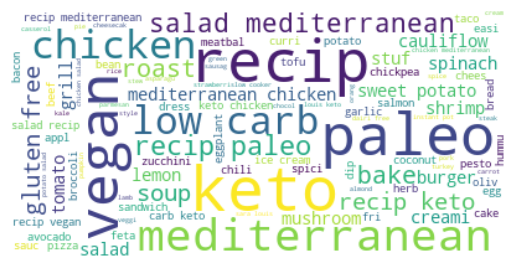

In [72]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")